In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


from tensorflow import keras
import tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

Dataset kaggle terbagi menjadi 2, train dan test dengan 6 class di masing-masing folder. Untuk klasifikasi code ini, hanya diperlukan 2 class dan 3 split (train, val, test) maka dari itu semua dataset akan digabung ke folder "temp" dengan 2 folder (rotten dan fresh).

In [2]:
from distutils.dir_util import copy_tree

train_folder = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'
test_folder = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test'

toDirectory = '/kaggle/working/temp/freshfruits';

fromDirectory = train_folder + '/freshapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/freshbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/freshoranges';
copy_tree(fromDirectory, toDirectory);

toDirectory = '/kaggle/working/temp/rottenfruits';

fromDirectory = train_folder + '/rottenapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/rottenbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = train_folder + '/rottenoranges';
copy_tree(fromDirectory, toDirectory);

toDirectory = '/kaggle/working/temp/freshfruits';

fromDirectory = test_folder + '/freshapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/freshbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/freshoranges';
copy_tree(fromDirectory, toDirectory);

toDirectory = '/kaggle/working/temp/rottenfruits';

fromDirectory = test_folder + '/rottenapples';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/rottenbanana';
copy_tree(fromDirectory, toDirectory);
fromDirectory = test_folder + '/rottenoranges';
copy_tree(fromDirectory, toDirectory);

In [3]:
#jumlah dataset rottenfruits
import os
from os import listdir
count =0
folder_dir = '/kaggle/working/temp/rottenfruits'
for images in os.listdir(folder_dir):
 
    if (images.endswith(".png")):
        count+=1
        
count

7695

In [4]:
#jumlah dataset freshfruits
count =0
folder_dir = '/kaggle/working/temp/freshfruits'
for images in os.listdir(folder_dir):
 
    if (images.endswith(".png")):
        count+=1
        
count

5904

In [5]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


split dataset menjadi train val dan test dengan ratio (8,1,1)

In [6]:
import splitfolders
input_folder = "/kaggle/working/temp"
splitfolders.ratio(input_folder, seed=42, ratio=(.8, .1, .1))

Copying files: 13599 files [00:05, 2530.23 files/s]


**VGG16**

In [7]:
base_model1 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

base_model1.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

**MobileNetV2**

In [8]:
base_model2 = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

base_model2.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, None, None, 3 0           bn_Conv1[0][0]                   
________________

**Xception**

In [9]:
base_model3 =tf.keras.applications.xception.Xception(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

base_model3.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________

**ResNet50**

In [10]:
base_model4 =tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

base_model4.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
__________________________

**InceptionV3**

In [49]:
base_model5 =tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    classes=2,
    classifier_activation="softmax"
)

base_model5.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, None, None, 3 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_98 (BatchNo (None, None, None, 3 96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 3 0           batch_normalization_98[0][0]     
_______________________________________________________________________________________

In [12]:
#classifiers = [[model1,'VGG16','x1'], [model2,'MobileNetV2','x2'], [model3,'Xception', 'x3'], [model4,'ResNet50', 'x4'], [model5,'InceptionV3', 'x5']]

In [13]:
for layer in base_model1.layers:
    base_model1.trainable = False

for layer in base_model2.layers:
    base_model2.trainable = False

for layer in base_model3.layers:
    base_model3.trainable = False

for layer in base_model4.layers:
    base_model4.trainable = False

for layer in base_model5.layers:
    base_model5.trainable = False

In [50]:
for layer in base_model5.layers:
    base_model5.trainable = False

In [14]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy') >= 98):
#       print("\nReached 98% accuracy. Stop Training")
#       self.model.stop_training = True

# callbacks = myCallback()

Untuk tambahan layer akan disamakan sehingga dapat dibandingkan

**VGG16**

In [15]:
inputs =  keras.Input(shape=(224, 224, 3))

x1 = base_model1(inputs, training=False)

# Pooling layer
pooling = keras.layers.GlobalAveragePooling2D()(x1)

#regularize
x1 = keras.layers.Dropout(0.2)(pooling)

x1 = keras.layers.Dense(256, activation='relu')(x1)
x1 = keras.layers.Dropout(0.2)(x1)
x1 = keras.layers.Dense(256, activation='relu')(x1)
x1 = keras.layers.Dropout(0.2)(x1)

# final dense layer
outputs = keras.layers.Dense(1,activation = 'sigmoid')(x1)

model1 = keras.Model(inputs, outputs)

**MobileNetV2**

In [16]:

x2 = base_model2(inputs, training=False)


# Add pooling layer
pooling2 = keras.layers.GlobalAveragePooling2D()(x2)

#regularize
x2 = keras.layers.Dropout(0.2)(pooling2)

x2 = keras.layers.Dense(256, activation='relu')(x2)
x2 = keras.layers.Dropout(0.2)(x2)
x2 = keras.layers.Dense(256, activation='relu')(x2)
x2 = keras.layers.Dropout(0.2)(x2)

# Add final dense layer
outputs2 = keras.layers.Dense(1,activation = 'sigmoid')(x2)

# Combine inputs and outputs to create model
model2 = keras.Model(inputs, outputs2)

**Xception**

In [17]:
x3 = base_model3(inputs, training=False)


# Add pooling layer
pooling3 = keras.layers.GlobalAveragePooling2D()(x3)

#regularize
x3 = keras.layers.Dropout(0.2)(pooling3)

x3 = keras.layers.Dense(256, activation='relu')(x3)
x3 = keras.layers.Dropout(0.2)(x3)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x3 = keras.layers.Dropout(0.2)(x3)

# Add final dense layer
outputs3 = keras.layers.Dense(1,activation = 'sigmoid')(x3)

# Combine inputs and outputs to create model
model3 = keras.Model(inputs, outputs3)

**ResNet50**

In [18]:
x4 = base_model4(inputs, training=False)


# Add pooling layer
pooling4 = keras.layers.GlobalAveragePooling2D()(x4)

#regularize
x4 = keras.layers.Dropout(0.2)(pooling4)

x4 = keras.layers.Dense(256, activation='relu')(x4)
x4 = keras.layers.Dropout(0.2)(x4)
x4 = keras.layers.Dense(256, activation='relu')(x4)
x4 = keras.layers.Dropout(0.2)(x4)

# Add final dense layer
outputs4 = keras.layers.Dense(1,activation = 'sigmoid')(x4)

# Combine inputs and outputs to create model
model4 = keras.Model(inputs, outputs4)

**InceptionV3**

In [52]:
x5 = base_model5(inputs, training=False)


# Add pooling layer
pooling5 = keras.layers.GlobalAveragePooling2D()(x5)
#functional base / sequential base
#regularize
x5 = keras.layers.Dropout(0.2)(pooling5)

x5 = keras.layers.Dense(256, activation='relu')(x5)
x5 = keras.layers.Dropout(0.2)(x5)
x5 = keras.layers.Dense(256, activation='relu')(x5)
x5 = keras.layers.Dropout(0.2)(x5)

# Add final dense layer
outputs5 = keras.layers.Dense(1,activation = 'sigmoid')(x5)

# Combine inputs and outputs to create model
model5 = keras.Model(inputs, outputs5)

In [20]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model1.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7bc4307dc190>,input_6,True
1,<keras.engine.functional.Functional object at 0x7bc4538cac10>,vgg16,False
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bc43078b4d0>,global_average_pooling2d,True
3,<keras.layers.core.Dropout object at 0x7bc4307da7d0>,dropout,True
4,<keras.layers.core.Dense object at 0x7bc432471850>,dense,True
5,<keras.layers.core.Dropout object at 0x7bc453bdbc10>,dropout_1,True
6,<keras.layers.core.Dense object at 0x7bc4307ac890>,dense_1,True
7,<keras.layers.core.Dropout object at 0x7bc4307ac7d0>,dropout_2,True
8,<keras.layers.core.Dense object at 0x7bc4307ac190>,dense_2,True


In [21]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model2.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7bc4307dc190>,input_6,True
1,<keras.engine.functional.Functional object at 0x7bc4502e7850>,mobilenetv2_1.00_224,False
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bc430731b90>,global_average_pooling2d_1,True
3,<keras.layers.core.Dropout object at 0x7bc4324794d0>,dropout_3,True
4,<keras.layers.core.Dense object at 0x7bc43062ca10>,dense_3,True
5,<keras.layers.core.Dropout object at 0x7bc432767310>,dropout_4,True
6,<keras.layers.core.Dense object at 0x7bc4305d1b50>,dense_4,True
7,<keras.layers.core.Dropout object at 0x7bc4305d1810>,dropout_5,True
8,<keras.layers.core.Dense object at 0x7bc4306ed190>,dense_5,True


In [22]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model3.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7bc4307dc190>,input_6,True
1,<keras.engine.functional.Functional object at 0x7bc45003f150>,xception,False
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bc4305efa10>,global_average_pooling2d_2,True
3,<keras.layers.core.Dropout object at 0x7bc4307a4550>,dropout_6,True
4,<keras.layers.core.Dense object at 0x7bc430555390>,dense_6,True
5,<keras.layers.core.Dropout object at 0x7bc4307313d0>,dropout_7,True
6,<keras.layers.core.Dense object at 0x7bc4304119d0>,dense_7,True
7,<keras.layers.core.Dropout object at 0x7bc430411f10>,dropout_8,True
8,<keras.layers.core.Dense object at 0x7bc4305eff10>,dense_8,True


In [23]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model4.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7bc4307dc190>,input_6,True
1,<keras.engine.functional.Functional object at 0x7bc454357510>,resnet50,False
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bc430247390>,global_average_pooling2d_3,True
3,<keras.layers.core.Dropout object at 0x7bc43057c350>,dropout_9,True
4,<keras.layers.core.Dense object at 0x7bc4302e0b10>,dense_9,True
5,<keras.layers.core.Dropout object at 0x7bc43078e9d0>,dropout_10,True
6,<keras.layers.core.Dense object at 0x7bc4302107d0>,dense_10,True
7,<keras.layers.core.Dropout object at 0x7bc430210b90>,dropout_11,True
8,<keras.layers.core.Dense object at 0x7bc4301ff190>,dense_11,True


In [53]:
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model5.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7bc4307dc190>,input_6,False
1,<keras.engine.functional.Functional object at 0x7bbf54697a50>,inception_v3,False
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bbf52d83dd0>,global_average_pooling2d_6,True
3,<keras.layers.core.Dropout object at 0x7bbf52d83e10>,dropout_18,True
4,<keras.layers.core.Dense object at 0x7bbf52af7390>,dense_18,True
5,<keras.layers.core.Dropout object at 0x7bbf52afef10>,dropout_19,True
6,<keras.layers.core.Dense object at 0x7bbf52b07950>,dense_19,True
7,<keras.layers.core.Dropout object at 0x7bbf52b10dd0>,dropout_20,True
8,<keras.layers.core.Dense object at 0x7bbf52b10c50>,dense_20,True


In [25]:
 train_datagen = ImageDataGenerator(
         rescale=1./255)
         #shear_range=0.2,
         #zoom_range=0.2,
         #horizontal_flip=True)
 test_datagen = ImageDataGenerator(rescale=1./255)
 train_generator = train_datagen.flow_from_directory(
         '/kaggle/working/output/train',
         target_size=(224, 224),
         batch_size=32,
         shuffle = False,
         class_mode='binary')
 validation_generator = test_datagen.flow_from_directory(
         '/kaggle/working/output/val',
         target_size=(224, 224),
         batch_size=32,
         shuffle = False,
         class_mode='binary')

Found 10879 images belonging to 2 classes.
Found 1359 images belonging to 2 classes.


In [26]:
# train_dataset = tf.keras.utils.image_dataset_from_directory(
#     '/kaggle/working/output/train',
#     labels='inferred',
#     label_mode='int',
#     class_names=None,
#     color_mode='rgb',
#     batch_size=32,
#     image_size=(224, 224),
#     shuffle=True,
#     seed=42,
#     #validation_split=0.2,
#     #subset='training',
#     interpolation='bilinear',
# )

# val_dataset = tf.keras.utils.image_dataset_from_directory(
#     '/kaggle/working/output/val',
#     labels='inferred',
#     label_mode='int',
#     color_mode='rgb',
#     batch_size=32,
#     image_size=(224, 224),
#     shuffle=True,
#     seed=42,
#     #validation_split=0.2,
#     #subset='validation',
#     interpolation='bilinear',
# )

# test_dataset = tf.keras.utils.image_dataset_from_directory(
#     '/kaggle/working/output/test',
#     labels='inferred',
#     label_mode='int',
#     color_mode='rgb',
#     batch_size=32,
#     image_size=(224, 224),
#     shuffle=True,
#     seed=42,
#     #validation_split=0.2,
#     #subset='validation',
#     interpolation='bilinear',
# )

In [27]:
history1 = model1.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
340/340 [==============================] - 76s 194ms/step - loss: 0.6410 - binary_accuracy: 0.6220 - accuracy: 0.6220 - val_loss: 0.5071 - val_binary_accuracy: 0.8499 - val_accuracy: 0.8499
Epoch 2/10
340/340 [==============================] - 61s 181ms/step - loss: 0.4646 - binary_accuracy: 0.7959 - accuracy: 0.7959 - val_loss: 0.3530 - val_binary_accuracy: 0.8602 - val_accuracy: 0.8602
Epoch 3/10
340/340 [==============================] - 62s 182ms/step - loss: 0.3561 - binary_accuracy: 0.8460 - accuracy: 0.8460 - val_loss: 0.2779 - val_binary_accuracy: 0.8911 - val_accuracy: 0.8911
Epoch 4/10
340/340 [==============================] - 62s 181ms/step - loss: 0.3099 - binary_accuracy: 0.8684 - accuracy: 0.8684 - val_loss: 0.2671 - val_binary_accuracy: 0.8955 - val_accuracy: 0.8955
Epoch 5/10
340/340 [==============================] - 62s 181ms/step - loss: 0.2825 - binary_accuracy: 0.8828 - accuracy: 0.8828 - val_loss: 0.2336 - val_binary_accuracy: 0.9088 - val_accuracy: 0.

In [28]:
history2 = model2.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)


Epoch 1/10
340/340 [==============================] - 63s 179ms/step - loss: 0.3498 - binary_accuracy: 0.8366 - accuracy: 0.8366 - val_loss: 0.1383 - val_binary_accuracy: 0.9492 - val_accuracy: 0.9492
Epoch 2/10
340/340 [==============================] - 61s 178ms/step - loss: 0.1331 - binary_accuracy: 0.9508 - accuracy: 0.9508 - val_loss: 0.1136 - val_binary_accuracy: 0.9566 - val_accuracy: 0.9566
Epoch 3/10
340/340 [==============================] - 60s 175ms/step - loss: 0.1049 - binary_accuracy: 0.9607 - accuracy: 0.9607 - val_loss: 0.0712 - val_binary_accuracy: 0.9676 - val_accuracy: 0.9676
Epoch 4/10
340/340 [==============================] - 60s 176ms/step - loss: 0.0827 - binary_accuracy: 0.9703 - accuracy: 0.9703 - val_loss: 0.0530 - val_binary_accuracy: 0.9823 - val_accuracy: 0.9823
Epoch 5/10
340/340 [==============================] - 60s 176ms/step - loss: 0.0604 - binary_accuracy: 0.9786 - accuracy: 0.9786 - val_loss: 0.0427 - val_binary_accuracy: 0.9853 - val_accuracy: 0.

In [29]:
history3 = model3.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
340/340 [==============================] - 67s 190ms/step - loss: 0.3327 - binary_accuracy: 0.8454 - accuracy: 0.8454 - val_loss: 0.1442 - val_binary_accuracy: 0.9433 - val_accuracy: 0.9433
Epoch 2/10
340/340 [==============================] - 62s 183ms/step - loss: 0.1326 - binary_accuracy: 0.9496 - accuracy: 0.9496 - val_loss: 0.1297 - val_binary_accuracy: 0.9455 - val_accuracy: 0.9455
Epoch 3/10
340/340 [==============================] - 64s 189ms/step - loss: 0.0985 - binary_accuracy: 0.9609 - accuracy: 0.9609 - val_loss: 0.0709 - val_binary_accuracy: 0.9772 - val_accuracy: 0.9772
Epoch 4/10
340/340 [==============================] - 64s 189ms/step - loss: 0.0717 - binary_accuracy: 0.9745 - accuracy: 0.9745 - val_loss: 0.0738 - val_binary_accuracy: 0.9684 - val_accuracy: 0.9684
Epoch 5/10
340/340 [==============================] - 63s 186ms/step - loss: 0.0649 - binary_accuracy: 0.9771 - accuracy: 0.9771 - val_loss: 0.0493 - val_binary_accuracy: 0.9801 - val_accuracy: 0.

In [30]:
history4 = model4.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
340/340 [==============================] - 66s 184ms/step - loss: 0.7154 - binary_accuracy: 0.5503 - accuracy: 0.5503 - val_loss: 0.6703 - val_binary_accuracy: 0.5659 - val_accuracy: 0.5659
Epoch 2/10
340/340 [==============================] - 62s 182ms/step - loss: 0.6949 - binary_accuracy: 0.5488 - accuracy: 0.5488 - val_loss: 0.7055 - val_binary_accuracy: 0.5659 - val_accuracy: 0.5659
Epoch 3/10
340/340 [==============================] - 62s 181ms/step - loss: 0.6865 - binary_accuracy: 0.5701 - accuracy: 0.5701 - val_loss: 0.6648 - val_binary_accuracy: 0.5659 - val_accuracy: 0.5659
Epoch 4/10
340/340 [==============================] - 61s 179ms/step - loss: 0.6761 - binary_accuracy: 0.5852 - accuracy: 0.5852 - val_loss: 0.6621 - val_binary_accuracy: 0.5659 - val_accuracy: 0.5659
Epoch 5/10
340/340 [==============================] - 63s 184ms/step - loss: 0.6745 - binary_accuracy: 0.5651 - accuracy: 0.5651 - val_loss: 0.6525 - val_binary_accuracy: 0.5725 - val_accuracy: 0.

In [54]:
history5 = model5.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
340/340 [==============================] - 69s 193ms/step - loss: 0.3682 - binary_accuracy: 0.8296 - accuracy: 0.8296 - val_loss: 0.1602 - val_binary_accuracy: 0.9294 - val_accuracy: 0.9294
Epoch 2/10
340/340 [==============================] - 61s 180ms/step - loss: 0.1580 - binary_accuracy: 0.9410 - accuracy: 0.9410 - val_loss: 0.1384 - val_binary_accuracy: 0.9382 - val_accuracy: 0.9382
Epoch 3/10
340/340 [==============================] - 62s 181ms/step - loss: 0.1144 - binary_accuracy: 0.9559 - accuracy: 0.9559 - val_loss: 0.1054 - val_binary_accuracy: 0.9544 - val_accuracy: 0.9544
Epoch 4/10
340/340 [==============================] - 60s 177ms/step - loss: 0.0897 - binary_accuracy: 0.9649 - accuracy: 0.9649 - val_loss: 0.0715 - val_binary_accuracy: 0.9706 - val_accuracy: 0.9706
Epoch 5/10
340/340 [==============================] - 60s 178ms/step - loss: 0.0795 - binary_accuracy: 0.9690 - accuracy: 0.9690 - val_loss: 0.0895 - val_binary_accuracy: 0.9698 - val_accuracy: 0.

In [32]:
#model1.evaluate(validation_generator, steps=validation_generator.samples/validation_generator.batch_size)
#model2.evaluate(validation_generator, steps=validation_generator.samples/validation_generator.batch_size)

In [55]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model1.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("VGG16")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 5))

Found 1361 images belonging to 2 classes.
VGG16
              precision    recall  f1-score   support

 freshfruits    0.85928   0.97124   0.91183       591
rottenfruits    0.97547   0.87792   0.92413       770

    accuracy                        0.91844      1361
   macro avg    0.91738   0.92458   0.91798      1361
weighted avg    0.92502   0.91844   0.91879      1361



In [56]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model2.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))
print("MobileNetV2")
class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 5))

Found 1361 images belonging to 2 classes.
MobileNetV2
              precision    recall  f1-score   support

 freshfruits    0.99827   0.97631   0.98717       591
rottenfruits    0.98212   0.99870   0.99034       770

    accuracy                        0.98898      1361
   macro avg    0.99019   0.98751   0.98875      1361
weighted avg    0.98913   0.98898   0.98896      1361



In [57]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model3.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))
print("Xception")
class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 5))

Found 1361 images belonging to 2 classes.
Xception
              precision    recall  f1-score   support

 freshfruits    0.99151   0.98816   0.98983       591
rottenfruits    0.99093   0.99351   0.99222       770

    accuracy                        0.99118      1361
   macro avg    0.99122   0.99083   0.99102      1361
weighted avg    0.99118   0.99118   0.99118      1361



In [58]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model4.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))
print("ResNet50")
class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 5))

Found 1361 images belonging to 2 classes.
ResNet50
              precision    recall  f1-score   support

 freshfruits    0.71212   0.15905   0.26003       591
rottenfruits    0.59561   0.95065   0.73237       770

    accuracy                        0.60691      1361
   macro avg    0.65386   0.55485   0.49620      1361
weighted avg    0.64620   0.60691   0.52726      1361



In [59]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model5.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))
print("InceptionV3")
class_labels = list(test_generator.class_indices.keys())
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 5))

Found 1361 images belonging to 2 classes.
InceptionV3
              precision    recall  f1-score   support

 freshfruits    0.97025   0.99323   0.98161       591
rottenfruits    0.99471   0.97662   0.98558       770

    accuracy                        0.98384      1361
   macro avg    0.98248   0.98493   0.98359      1361
weighted avg    0.98409   0.98384   0.98386      1361



**Fine tuning**

**untuk pretrained model VGG16, unfreeze block terakhir**

In [60]:
for i, layer in enumerate(base_model1.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [61]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792 

In [62]:
for layer in base_model1.layers:
    base_model1.trainable = True

In [63]:
# fine tuning dari layer 15 sampai akhir
fine_tune = 15

# freeze layer sebelum layer 15
for layer in base_model1.layers[:fine_tune]:
    layer.trainable = False

In [64]:
for i, layer in enumerate(base_model1.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [69]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model1.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7bc4307dc190>,input_6,True
1,<keras.engine.functional.Functional object at 0x7bc4538cac10>,vgg16,True
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bc43078b4d0>,global_average_pooling2d,True
3,<keras.layers.core.Dropout object at 0x7bc4307da7d0>,dropout,True
4,<keras.layers.core.Dense object at 0x7bc432471850>,dense,True
5,<keras.layers.core.Dropout object at 0x7bc453bdbc10>,dropout_1,True
6,<keras.layers.core.Dense object at 0x7bc4307ac890>,dense_1,True
7,<keras.layers.core.Dropout object at 0x7bc4307ac7d0>,dropout_2,True
8,<keras.layers.core.Dense object at 0x7bc4307ac190>,dense_2,True


In [70]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792 

In [71]:
history_fine1 = model1.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
340/340 [==============================] - 66s 189ms/step - loss: 0.1548 - binary_accuracy: 0.9380 - accuracy: 0.9380 - val_loss: 0.1193 - val_binary_accuracy: 0.9492 - val_accuracy: 0.9492
Epoch 2/10
340/340 [==============================] - 61s 180ms/step - loss: 0.0738 - binary_accuracy: 0.9720 - accuracy: 0.9720 - val_loss: 0.0647 - val_binary_accuracy: 0.9728 - val_accuracy: 0.9728
Epoch 3/10
340/340 [==============================] - 63s 186ms/step - loss: 0.0425 - binary_accuracy: 0.9837 - accuracy: 0.9837 - val_loss: 0.0230 - val_binary_accuracy: 0.9904 - val_accuracy: 0.9904
Epoch 4/10
340/340 [==============================] - 64s 188ms/step - loss: 0.0236 - binary_accuracy: 0.9920 - accuracy: 0.9920 - val_loss: 0.0163 - val_binary_accuracy: 0.9948 - val_accuracy: 0.9948
Epoch 5/10
340/340 [==============================] - 61s 180ms/step - loss: 0.0142 - binary_accuracy: 0.9955 - accuracy: 0.9955 - val_loss: 0.0329 - val_binary_accuracy: 0.9897 - val_accuracy: 0.

**Untuk pretrained MobileNetV2 : freeze 2 block terakhir**

In [75]:
for layer in base_model2.layers:
    base_model2.trainable = True

In [76]:
for i, layer in enumerate(base_model2.layers):
    print(i, layer.name, layer.trainable)

0 input_2 True
1 Conv1 True
2 bn_Conv1 True
3 Conv1_relu True
4 expanded_conv_depthwise True
5 expanded_conv_depthwise_BN True
6 expanded_conv_depthwise_relu True
7 expanded_conv_project True
8 expanded_conv_project_BN True
9 block_1_expand True
10 block_1_expand_BN True
11 block_1_expand_relu True
12 block_1_pad True
13 block_1_depthwise True
14 block_1_depthwise_BN True
15 block_1_depthwise_relu True
16 block_1_project True
17 block_1_project_BN True
18 block_2_expand True
19 block_2_expand_BN True
20 block_2_expand_relu True
21 block_2_depthwise True
22 block_2_depthwise_BN True
23 block_2_depthwise_relu True
24 block_2_project True
25 block_2_project_BN True
26 block_2_add True
27 block_3_expand True
28 block_3_expand_BN True
29 block_3_expand_relu True
30 block_3_pad True
31 block_3_depthwise True
32 block_3_depthwise_BN True
33 block_3_depthwise_relu True
34 block_3_project True
35 block_3_project_BN True
36 block_4_expand True
37 block_4_expand_BN True
38 block_4_expand_relu Tru

In [77]:
# fine tuning dari layer 134 sampai akhir
fine_tune = 134

# freeze layer sebelum layer 134
for layer in base_model2.layers[:fine_tune]:
    layer.trainable = False

In [78]:
for i, layer in enumerate(base_model2.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

In [80]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model2.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7bc4307dc190>,input_6,True
1,<keras.engine.functional.Functional object at 0x7bc4502e7850>,mobilenetv2_1.00_224,True
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bc430731b90>,global_average_pooling2d_1,True
3,<keras.layers.core.Dropout object at 0x7bc4324794d0>,dropout_3,True
4,<keras.layers.core.Dense object at 0x7bc43062ca10>,dense_3,True
5,<keras.layers.core.Dropout object at 0x7bc432767310>,dropout_4,True
6,<keras.layers.core.Dense object at 0x7bc4305d1b50>,dense_4,True
7,<keras.layers.core.Dropout object at 0x7bc4305d1810>,dropout_5,True
8,<keras.layers.core.Dense object at 0x7bc4306ed190>,dense_5,True


In [81]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, None, None, 1280)  2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               327936    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6579

In [82]:
history_fine2 = model2.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
340/340 [==============================] - 62s 176ms/step - loss: 0.0304 - binary_accuracy: 0.9887 - accuracy: 0.9887 - val_loss: 0.0163 - val_binary_accuracy: 0.9934 - val_accuracy: 0.9934
Epoch 2/10
340/340 [==============================] - 62s 183ms/step - loss: 0.0213 - binary_accuracy: 0.9925 - accuracy: 0.9925 - val_loss: 0.0160 - val_binary_accuracy: 0.9941 - val_accuracy: 0.9941
Epoch 3/10
340/340 [==============================] - 60s 177ms/step - loss: 0.0120 - binary_accuracy: 0.9959 - accuracy: 0.9959 - val_loss: 0.0140 - val_binary_accuracy: 0.9948 - val_accuracy: 0.9948
Epoch 4/10
340/340 [==============================] - 59s 173ms/step - loss: 0.0111 - binary_accuracy: 0.9963 - accuracy: 0.9963 - val_loss: 0.0067 - val_binary_accuracy: 0.9978 - val_accuracy: 0.9978
Epoch 5/10
340/340 [==============================] - 59s 175ms/step - loss: 0.0117 - binary_accuracy: 0.9961 - accuracy: 0.9961 - val_loss: 0.0079 - val_binary_accuracy: 0.9963 - val_accuracy: 0.

**untuk pretrained model Xception, unfreeze 2 block terakhir**

In [83]:
for i, layer in enumerate(base_model3.layers):
    print(i, layer.name, layer.trainable)

0 input_3 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 False

In [84]:
for layer in base_model3.layers:
    base_model3.trainable = True

In [86]:
# fine tuning dari layer 116 sampai akhir
fine_tune = 116

# freeze layer sebelum layer 116
for layer in base_model3.layers[:fine_tune]:
    layer.trainable = False

In [88]:
for i, layer in enumerate(base_model3.layers):
    print(i, layer.name, layer.trainable)

0 input_3 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 False

In [90]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model3.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7bc4307dc190>,input_6,True
1,<keras.engine.functional.Functional object at 0x7bc45003f150>,xception,True
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bc4305efa10>,global_average_pooling2d_2,True
3,<keras.layers.core.Dropout object at 0x7bc4307a4550>,dropout_6,True
4,<keras.layers.core.Dense object at 0x7bc430555390>,dense_6,True
5,<keras.layers.core.Dropout object at 0x7bc4307313d0>,dropout_7,True
6,<keras.layers.core.Dense object at 0x7bc4304119d0>,dense_7,True
7,<keras.layers.core.Dropout object at 0x7bc430411f10>,dropout_8,True
8,<keras.layers.core.Dense object at 0x7bc4305eff10>,dense_8,True


In [91]:
history_fine3 = model3.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
340/340 [==============================] - 69s 195ms/step - loss: 0.0280 - binary_accuracy: 0.9897 - accuracy: 0.9897 - val_loss: 0.0148 - val_binary_accuracy: 0.9948 - val_accuracy: 0.9948
Epoch 2/10
340/340 [==============================] - 63s 185ms/step - loss: 0.0158 - binary_accuracy: 0.9940 - accuracy: 0.9940 - val_loss: 0.0097 - val_binary_accuracy: 0.9971 - val_accuracy: 0.9971
Epoch 3/10
340/340 [==============================] - 63s 186ms/step - loss: 0.0093 - binary_accuracy: 0.9976 - accuracy: 0.9976 - val_loss: 0.0111 - val_binary_accuracy: 0.9948 - val_accuracy: 0.9948
Epoch 4/10
340/340 [==============================] - 65s 191ms/step - loss: 0.0070 - binary_accuracy: 0.9977 - accuracy: 0.9977 - val_loss: 0.0039 - val_binary_accuracy: 0.9993 - val_accuracy: 0.9993
Epoch 5/10
340/340 [==============================] - 63s 187ms/step - loss: 0.0052 - binary_accuracy: 0.9983 - accuracy: 0.9983 - val_loss: 0.0039 - val_binary_accuracy: 0.9993 - val_accuracy: 0.

**untuk pretrained model ResNet50, unfreeze conv_block terakhir**

In [92]:
for i, layer in enumerate(base_model4.layers):
    print(i, layer.name, layer.trainable)

0 input_4 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [93]:
for layer in base_model4.layers:
    base_model4.trainable = True

In [94]:
# fine tuning dari layer 143 sampai akhir
fine_tune = 143

# freeze layer sebelum layer 143
for layer in base_model4.layers[:fine_tune]:
    layer.trainable = False

In [95]:
for i, layer in enumerate(base_model4.layers):
    print(i, layer.name, layer.trainable)

0 input_4 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [96]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model4.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7bc4307dc190>,input_6,True
1,<keras.engine.functional.Functional object at 0x7bc454357510>,resnet50,True
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bc430247390>,global_average_pooling2d_3,True
3,<keras.layers.core.Dropout object at 0x7bc43057c350>,dropout_9,True
4,<keras.layers.core.Dense object at 0x7bc4302e0b10>,dense_9,True
5,<keras.layers.core.Dropout object at 0x7bc43078e9d0>,dropout_10,True
6,<keras.layers.core.Dense object at 0x7bc4302107d0>,dense_10,True
7,<keras.layers.core.Dropout object at 0x7bc430210b90>,dropout_11,True
8,<keras.layers.core.Dense object at 0x7bc4301ff190>,dense_11,True


In [97]:
history_fine4 = model4.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
340/340 [==============================] - 69s 191ms/step - loss: 0.6959 - binary_accuracy: 0.5661 - accuracy: 0.5661 - val_loss: 0.6681 - val_binary_accuracy: 0.6424 - val_accuracy: 0.6424
Epoch 2/10
340/340 [==============================] - 62s 183ms/step - loss: 0.6613 - binary_accuracy: 0.5789 - accuracy: 0.5789 - val_loss: 0.6241 - val_binary_accuracy: 0.6115 - val_accuracy: 0.6115
Epoch 3/10
340/340 [==============================] - 62s 183ms/step - loss: 0.6480 - binary_accuracy: 0.6132 - accuracy: 0.6132 - val_loss: 0.6322 - val_binary_accuracy: 0.5997 - val_accuracy: 0.5997
Epoch 4/10
340/340 [==============================] - 62s 181ms/step - loss: 0.6400 - binary_accuracy: 0.6138 - accuracy: 0.6138 - val_loss: 0.6215 - val_binary_accuracy: 0.6990 - val_accuracy: 0.6990
Epoch 5/10
340/340 [==============================] - 63s 185ms/step - loss: 0.6356 - binary_accuracy: 0.6125 - accuracy: 0.6125 - val_loss: 0.6091 - val_binary_accuracy: 0.6593 - val_accuracy: 0.

**Untuk pretrained inceptionV3, akan unfreeze dari layer 258**

In [98]:
for i, layer in enumerate(base_model5.layers):
    print(i, layer.name, layer.trainable)

0 input_7 False
1 conv2d_98 False
2 batch_normalization_98 False
3 activation_94 False
4 conv2d_99 False
5 batch_normalization_99 False
6 activation_95 False
7 conv2d_100 False
8 batch_normalization_100 False
9 activation_96 False
10 max_pooling2d_4 False
11 conv2d_101 False
12 batch_normalization_101 False
13 activation_97 False
14 conv2d_102 False
15 batch_normalization_102 False
16 activation_98 False
17 max_pooling2d_5 False
18 conv2d_106 False
19 batch_normalization_106 False
20 activation_102 False
21 conv2d_104 False
22 conv2d_107 False
23 batch_normalization_104 False
24 batch_normalization_107 False
25 activation_100 False
26 activation_103 False
27 average_pooling2d_9 False
28 conv2d_103 False
29 conv2d_105 False
30 conv2d_108 False
31 conv2d_109 False
32 batch_normalization_103 False
33 batch_normalization_105 False
34 batch_normalization_108 False
35 batch_normalization_109 False
36 activation_99 False
37 activation_101 False
38 activation_104 False
39 activation_105 False


In [99]:
for layer in base_model5.layers:
    base_model5.trainable = True

In [100]:
# fine tuning dari layer 258 sampai akhir
fine_tune = 258

# freeze layer sebelum layer 258
for layer in base_model5.layers[:fine_tune]:
    layer.trainable = False

In [101]:
for i, layer in enumerate(base_model5.layers):
    print(i, layer.name, layer.trainable)

0 input_7 False
1 conv2d_98 False
2 batch_normalization_98 False
3 activation_94 False
4 conv2d_99 False
5 batch_normalization_99 False
6 activation_95 False
7 conv2d_100 False
8 batch_normalization_100 False
9 activation_96 False
10 max_pooling2d_4 False
11 conv2d_101 False
12 batch_normalization_101 False
13 activation_97 False
14 conv2d_102 False
15 batch_normalization_102 False
16 activation_98 False
17 max_pooling2d_5 False
18 conv2d_106 False
19 batch_normalization_106 False
20 activation_102 False
21 conv2d_104 False
22 conv2d_107 False
23 batch_normalization_104 False
24 batch_normalization_107 False
25 activation_100 False
26 activation_103 False
27 average_pooling2d_9 False
28 conv2d_103 False
29 conv2d_105 False
30 conv2d_108 False
31 conv2d_109 False
32 batch_normalization_103 False
33 batch_normalization_105 False
34 batch_normalization_108 False
35 batch_normalization_109 False
36 activation_99 False
37 activation_101 False
38 activation_104 False
39 activation_105 False


In [102]:
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in model5.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7bc4307dc190>,input_6,True
1,<keras.engine.functional.Functional object at 0x7bbf54697a50>,inception_v3,True
2,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bbf52d83dd0>,global_average_pooling2d_6,True
3,<keras.layers.core.Dropout object at 0x7bbf52d83e10>,dropout_18,True
4,<keras.layers.core.Dense object at 0x7bbf52af7390>,dense_18,True
5,<keras.layers.core.Dropout object at 0x7bbf52afef10>,dropout_19,True
6,<keras.layers.core.Dense object at 0x7bbf52b07950>,dense_19,True
7,<keras.layers.core.Dropout object at 0x7bbf52b10dd0>,dropout_20,True
8,<keras.layers.core.Dense object at 0x7bbf52b10c50>,dense_20,True


In [103]:
model5.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling2d_6 ( (None, 2048)              0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               524544    
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               6579

In [104]:
history_fine5 = model5.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
340/340 [==============================] - 68s 189ms/step - loss: 0.0306 - binary_accuracy: 0.9879 - accuracy: 0.9879 - val_loss: 0.0196 - val_binary_accuracy: 0.9926 - val_accuracy: 0.9926
Epoch 2/10
340/340 [==============================] - 60s 177ms/step - loss: 0.0120 - binary_accuracy: 0.9961 - accuracy: 0.9961 - val_loss: 0.0101 - val_binary_accuracy: 0.9956 - val_accuracy: 0.9956
Epoch 3/10
340/340 [==============================] - 63s 186ms/step - loss: 0.0048 - binary_accuracy: 0.9988 - accuracy: 0.9988 - val_loss: 0.0077 - val_binary_accuracy: 0.9971 - val_accuracy: 0.9971
Epoch 4/10
340/340 [==============================] - 63s 185ms/step - loss: 0.0030 - binary_accuracy: 0.9994 - accuracy: 0.9994 - val_loss: 0.0069 - val_binary_accuracy: 0.9978 - val_accuracy: 0.9978
Epoch 5/10
340/340 [==============================] - 61s 180ms/step - loss: 0.0015 - binary_accuracy: 0.9997 - accuracy: 0.9997 - val_loss: 0.0056 - val_binary_accuracy: 0.9993 - val_accuracy: 0.

**Classification report setelah fine-tuning**

**VGG16**

In [122]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model1.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("VGG16 after fine-tuning")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 7))

Found 1361 images belonging to 2 classes.
VGG16 after fine-tuning
              precision    recall  f1-score   support

 freshfruits  0.9966044 0.9932318 0.9949153       591
rottenfruits  0.9948187 0.9974026 0.9961089       770

    accuracy                      0.9955915      1361
   macro avg  0.9957115 0.9953172 0.9955121      1361
weighted avg  0.9955941 0.9955915 0.9955906      1361



**MobileNetV2**

In [106]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model2.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("MobileNetV2 after fine-tuning")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 7))

Found 1361 images belonging to 2 classes.
MobileNetV2 after fine-tuning
              precision    recall  f1-score   support

 freshfruits  0.9983022 0.9949239 0.9966102       591
rottenfruits  0.9961140 0.9987013 0.9974060       770

    accuracy                      0.9970610      1361
   macro avg  0.9972081 0.9968126 0.9970081      1361
weighted avg  0.9970642 0.9970610 0.9970604      1361



**Xception**

In [120]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model3.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("Xception after fine-tuning")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 7))

Found 1361 images belonging to 2 classes.
Xception after fine-tuning
              precision    recall  f1-score   support

 freshfruits  0.9966044 0.9932318 0.9949153       591
rottenfruits  0.9948187 0.9974026 0.9961089       770

    accuracy                      0.9955915      1361
   macro avg  0.9957115 0.9953172 0.9955121      1361
weighted avg  0.9955941 0.9955915 0.9955906      1361



**ResNet50**

In [108]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model4.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("ResNet50 after fine-tuning")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 7))

Found 1361 images belonging to 2 classes.
ResNet50 after fine-tuning
              precision    recall  f1-score   support

 freshfruits  0.5894358 0.8307953 0.6896067       591
rottenfruits  0.8106061 0.5558442 0.6594761       770

    accuracy                      0.6752388      1361
   macro avg  0.7000209 0.6933197 0.6745414      1361
weighted avg  0.7145652 0.6752388 0.6725600      1361



**InceptionV3**

In [109]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = model5.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("InceptionV3 after fine-tuning")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 7))

Found 1361 images belonging to 2 classes.
InceptionV3 after fine-tuning
              precision    recall  f1-score   support

 freshfruits  0.9949410 0.9983080 0.9966216       591
rottenfruits  0.9986979 0.9961039 0.9973992       770

    accuracy                      0.9970610      1361
   macro avg  0.9968194 0.9972059 0.9970104      1361
weighted avg  0.9970665 0.9970610 0.9970616      1361



**accuracy sebelum fine-tuning (pretrained) dari highest to lowest:**

**Xception** : 0.99118
**MobileNetV2** : 0.98898
**InceptionV3** : 0.98384
VGG16 : 0.91844
ResNet50 : 0.60691

**accuracy sesudah fine-tuning dari highest to lowest:**

**MobileNetV2** : 0.9974060
**InceptionV3** : 0.9970610
**Xception** : 0.9955915
VGG16 : 0.9955915 
ResNet50 : 0.6752388

**Kesimpulan : fine-tuning memperbagus akurasi semua model**

**Fusion Model**

Menggunakan 3 model dengan akurasi tertinggi, **Xception(model3)**, **MobileNetV2(model2)**, dan **InceptionV3(model5)**

In [110]:
from tensorflow.keras.layers import Input, Dense, concatenate
fusion_model = concatenate([pooling3,pooling2,pooling5], name = "concatenated_layer")
output_layer = Dense(1, activation = "sigmoid", name = "output_layer")(fusion_model)

In [111]:
from tensorflow.keras.models import Model
merged = Model(inputs=inputs,outputs=[output_layer], name = "merged_model")

merged.summary()

Model: "merged_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
xception (Functional)           (None, None, None, 2 20861480    input_6[0][0]                    
__________________________________________________________________________________________________
mobilenetv2_1.00_224 (Functiona (None, None, None, 1 2257984     input_6[0][0]                    
__________________________________________________________________________________________________
inception_v3 (Functional)       (None, None, None, 2 21802784    input_6[0][0]                    
_______________________________________________________________________________________

In [112]:
merged.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                      'accuracy'])
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in merged.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7bc4307dc190>,input_6,True
1,<keras.engine.functional.Functional object at 0x7bc45003f150>,xception,True
2,<keras.engine.functional.Functional object at 0x7bc4502e7850>,mobilenetv2_1.00_224,True
3,<keras.engine.functional.Functional object at 0x7bbf54697a50>,inception_v3,True
4,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bc4305efa10>,global_average_pooling2d_2,True
5,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bc430731b90>,global_average_pooling2d_1,True
6,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7bbf52d83dd0>,global_average_pooling2d_6,True
7,<keras.layers.merge.Concatenate object at 0x7bc432c8e350>,concatenated_layer,True
8,<keras.layers.core.Dense object at 0x7bbf460c4610>,output_layer,True


In [113]:
merged.summary()

Model: "merged_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
xception (Functional)           (None, None, None, 2 20861480    input_6[0][0]                    
__________________________________________________________________________________________________
mobilenetv2_1.00_224 (Functiona (None, None, None, 1 2257984     input_6[0][0]                    
__________________________________________________________________________________________________
inception_v3 (Functional)       (None, None, None, 2 21802784    input_6[0][0]                    
_______________________________________________________________________________________

**Fusion Model**

In [114]:
history6 = merged.fit(
        train_generator,
        epochs=10,
        verbose = 1,
        validation_data=validation_generator)

Epoch 1/10
340/340 [==============================] - 83s 218ms/step - loss: 0.0984 - binary_accuracy: 0.9622 - accuracy: 0.9622 - val_loss: 0.0181 - val_binary_accuracy: 0.9956 - val_accuracy: 0.9956
Epoch 2/10
340/340 [==============================] - 73s 216ms/step - loss: 0.0086 - binary_accuracy: 0.9969 - accuracy: 0.9969 - val_loss: 0.0275 - val_binary_accuracy: 0.9882 - val_accuracy: 0.9882
Epoch 3/10
340/340 [==============================] - 72s 211ms/step - loss: 0.0126 - binary_accuracy: 0.9958 - accuracy: 0.9958 - val_loss: 0.0013 - val_binary_accuracy: 1.0000 - val_accuracy: 1.0000
Epoch 4/10
340/340 [==============================] - 72s 212ms/step - loss: 4.5374e-04 - binary_accuracy: 0.9999 - accuracy: 0.9999 - val_loss: 0.0015 - val_binary_accuracy: 0.9993 - val_accuracy: 0.9993
Epoch 5/10
340/340 [==============================] - 71s 209ms/step - loss: 7.8114e-05 - binary_accuracy: 1.0000 - accuracy: 1.0000 - val_loss: 0.0012 - val_binary_accuracy: 0.9993 - val_accu

In [ ]:
# merged.save('fusion_model.h5')
# #model_merged = load_model('fusion_model.h5')

In [148]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(224, 224),
        shuffle = False,
        class_mode='binary')
val_trues =test_generator.classes
Y_pred = merged.predict(test_generator)
val_preds = list(map((lambda x: 0 if x < 0.5 else 1),Y_pred))

class_labels = list(test_generator.class_indices.keys())
print("Fusion model after fine-tuning")
print(classification_report(val_trues, val_preds,target_names=class_labels, digits = 10))

Found 1361 images belonging to 2 classes.
Fusion model after fine-tuning
              precision    recall  f1-score   support

 freshfruits  1.0000000000 0.9983079526 0.9991532599       591
rottenfruits  0.9987029831 1.0000000000 0.9993510707       770

    accuracy                      0.9992652461      1361
   macro avg  0.9993514916 0.9991539763 0.9992521653      1361
weighted avg  0.9992661991 0.9992652461 0.9992651735      1361



**Accuracy tertinggi ada pada fusion model dengan accuracy : 0.9992652461**

**Plot untuk loss dan accuracy**

**VGG16**

<Figure size 432x288 with 0 Axes>

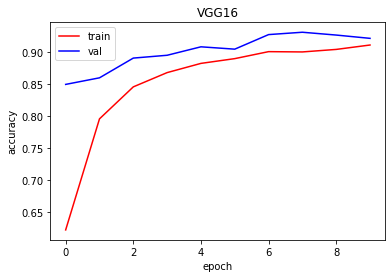

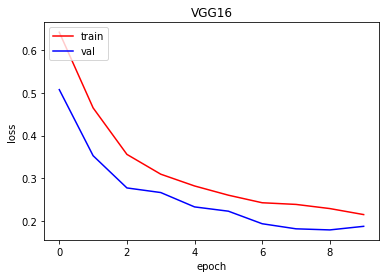

<Figure size 432x288 with 0 Axes>

In [123]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('VGG16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('VGG16')
plt.figure()

**MobileNetV2**

<Figure size 432x288 with 0 Axes>

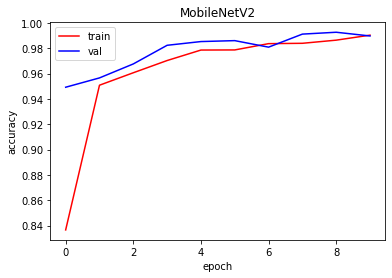

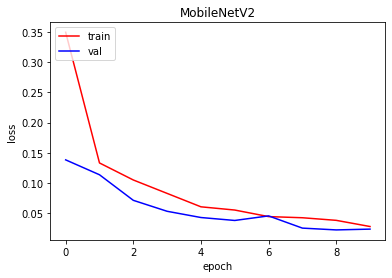

<Figure size 432x288 with 0 Axes>

In [124]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('MobileNetV2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('MobileNetV2')
plt.figure()
     

**Xception**

<Figure size 432x288 with 0 Axes>

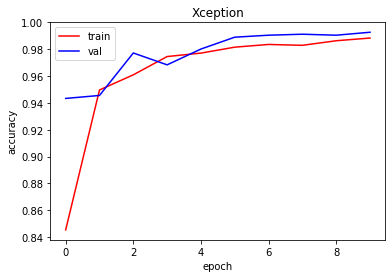

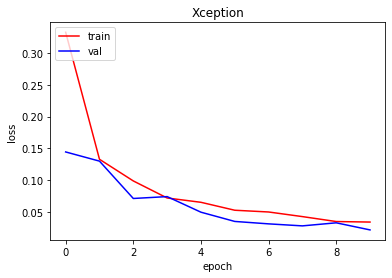

<Figure size 432x288 with 0 Axes>

In [125]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Xception')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Xception')
plt.figure()
     

**ResNet50**

<Figure size 432x288 with 0 Axes>

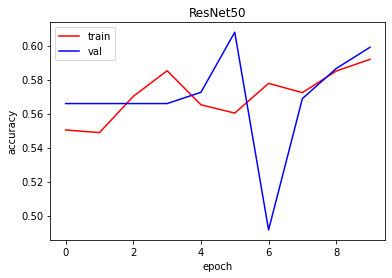

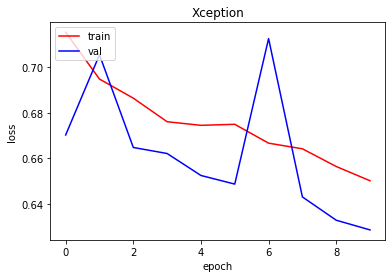

<Figure size 432x288 with 0 Axes>

In [126]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('ResNet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Xception')
plt.figure()
     

**InceptionV3**

<Figure size 432x288 with 0 Axes>

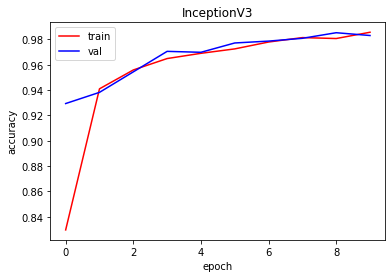

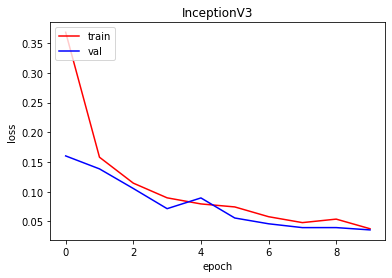

<Figure size 432x288 with 0 Axes>

In [127]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('InceptionV3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('InceptionV3')
plt.figure()
     

**Fine-tuning**

**VGG16 after fine-tuning**

<Figure size 432x288 with 0 Axes>

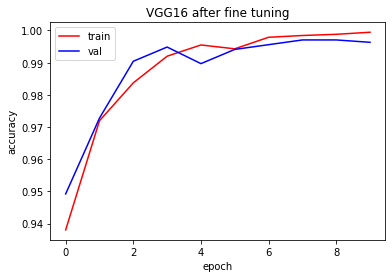

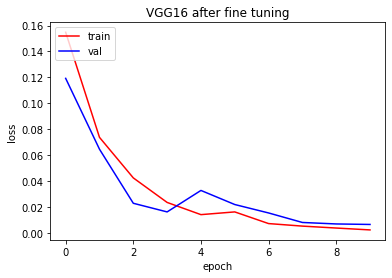

<Figure size 432x288 with 0 Axes>

In [128]:
acc = history_fine1.history['accuracy']
val_acc = history_fine1.history['val_accuracy']
loss = history_fine1.history['loss']
val_loss = history_fine1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('VGG16 after fine tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('VGG16 after fine tuning')
plt.figure()

**MobileNetV2 after fine tuning**

<Figure size 432x288 with 0 Axes>

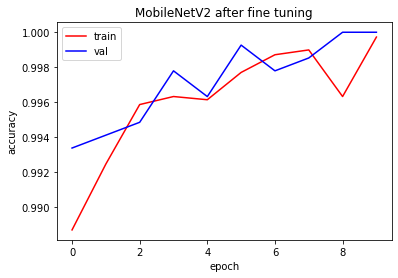

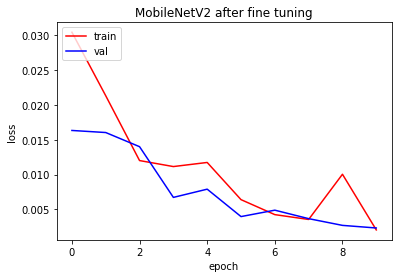

<Figure size 432x288 with 0 Axes>

In [129]:
acc = history_fine2.history['accuracy']
val_acc = history_fine2.history['val_accuracy']
loss = history_fine2.history['loss']
val_loss = history_fine2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('MobileNetV2 after fine tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('MobileNetV2 after fine tuning')
plt.figure()

**Xception after fine tuning**

<Figure size 432x288 with 0 Axes>

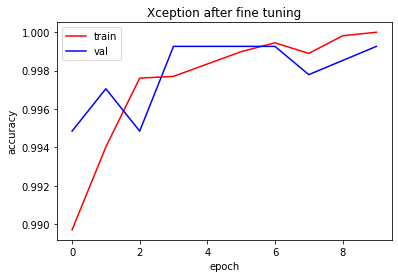

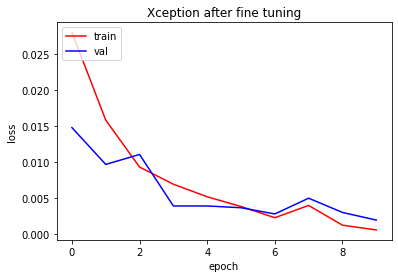

<Figure size 432x288 with 0 Axes>

In [130]:
acc = history_fine3.history['accuracy']
val_acc = history_fine3.history['val_accuracy']
loss = history_fine3.history['loss']
val_loss = history_fine3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Xception after fine tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Xception after fine tuning')
plt.figure()

**ResNet50 after fine tuning**

<Figure size 432x288 with 0 Axes>

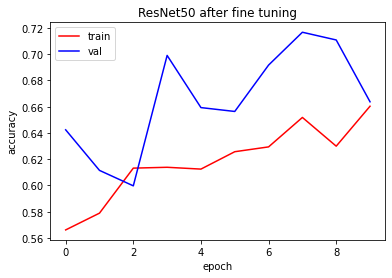

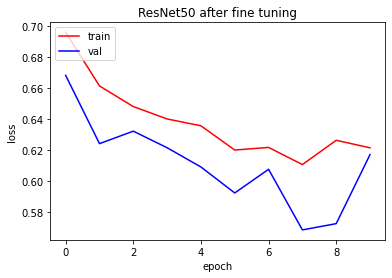

<Figure size 432x288 with 0 Axes>

In [131]:
acc = history_fine4.history['accuracy']
val_acc = history_fine4.history['val_accuracy']
loss = history_fine4.history['loss']
val_loss = history_fine4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('ResNet50 after fine tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('ResNet50 after fine tuning')
plt.figure()

**InceptionV3 after fine tuning**

<Figure size 432x288 with 0 Axes>

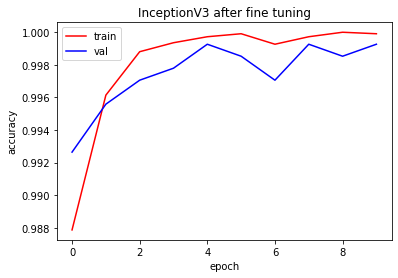

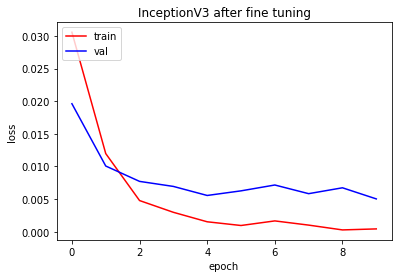

<Figure size 432x288 with 0 Axes>

In [132]:
acc = history_fine5.history['accuracy']
val_acc = history_fine5.history['val_accuracy']
loss = history_fine5.history['loss']
val_loss = history_fine5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('InceptionV3 after fine tuning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('InceptionV3 after fine tuning')
plt.figure()

**Fusion Model**

<Figure size 432x288 with 0 Axes>

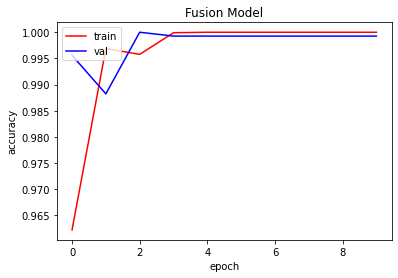

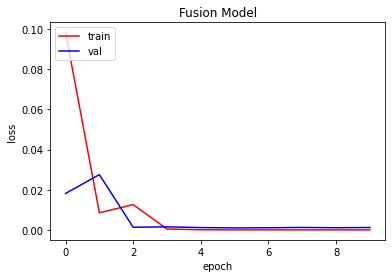

<Figure size 432x288 with 0 Axes>

In [133]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Fusion Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Fusion Model')
plt.figure()
     

coba predict gambar menggunakan model accuracy tertinggi yaitu **fusion model/merged dan fine-tuned MobileNetV2**

In [134]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    #print(image.shape)
    plt.imshow(image)

In [155]:
def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model2.predict(image)
    return preds

In [136]:
def fresh_or_rotten(image_path):
    preds = make_predictions(image_path)
    print(preds)
    if preds <= 0.5:
        print("The fruit is fresh")
    else:
        print("The fruit is rotten")

[[0.00165679]]
The fruit is fresh


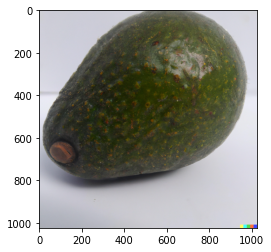

In [156]:
fresh_or_rotten('/kaggle/input/myfruitpictures/fresh_avocado_dalle.png')

[[1.7310215e-06]]
The fruit is fresh


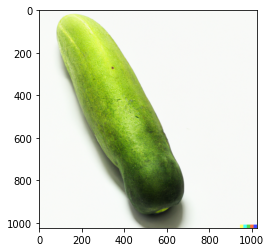

In [157]:
fresh_or_rotten('/kaggle/input/myfruitpictures/fresh_cucumber_dalle.png')

[[0.9878292]]
The fruit is rotten


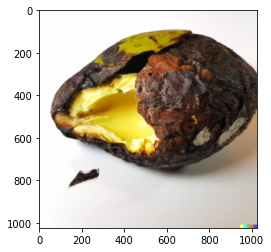

In [158]:
fresh_or_rotten('/kaggle/input/myfruitpictures/rotten_avocado_dalle.png')

In [159]:
def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = merged.predict(image)
    return preds

[[0.]]
The fruit is fresh


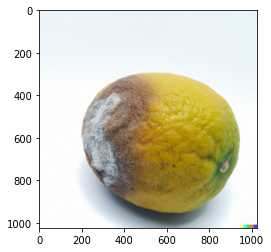

In [160]:
fresh_or_rotten('/kaggle/input/myfruitpictures/rotten_lemon_dalle.png')

[[0.]]
The fruit is fresh


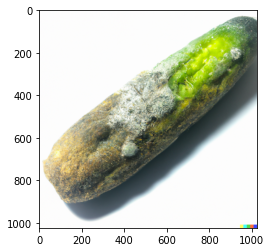

In [161]:
fresh_or_rotten('/kaggle/input/myfruitpictures/rotten_cucumber_dalle.png')

[[0.]]
The fruit is fresh


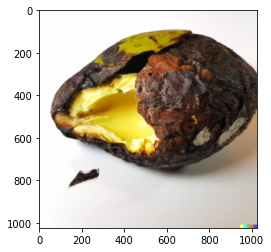

In [162]:
fresh_or_rotten('/kaggle/input/myfruitpictures/rotten_avocado_dalle.png')

**Meskipun akurasi fusion model tertinggi, namun saat ditest mengeluarkan hasil yang tidak memuaskan/salah, dibandingkan dengan model2(fine-tuned MobileNetV2)**